In [8]:
import numpy as np 
import mlrose
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, datasets
import matplotlib.pyplot as plt

import time
import warnings

**<font color=black size=5>4 Functions</font>**

In [9]:
def ini_problem(n):
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.15), maximize=True, max_val=2)
    return problem

In [10]:
# Algorithm: randomized hill climbing
def RHC():
    print("STARTING SIX PEAKS PROBLEM WITH RANDOMIZED HILL CLIMBING")
    fitnesses = []
    runtime = []
    for n in range(10, 110, 10):
        start = time.time()
        fitness = mlrose.SixPeaks(t_pct=0.15)
        problem = ini_problem(n)
#         schedule = mlrose.ExpDecay()
#         np.random.seed(65)
        init_state = np.random.randint(2, size=n)
        
        best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem, max_attempts=10000, max_iters=10000, init_state=init_state, curve=True)        
        
        finish_time = time.time() - start
        runtime.append(finish_time)
        
        fitnesses.append(best_fitness_rhc)
#         print('time for rhc for n={}: {}'.format(n, time.time() - start))
#         print('best fitness for n={}: {}'.format(n, best_fitness_rhc))
    return fitnesses, runtime, fitness_curve_rhc


# Algorithm: simulated annealing
def SA():
    print("STARTING SIX PEAKS PROBLEM WITH SIMULATED ANNEALING")
    fitnesses = []
    runtime = []
    for n in range(10, 110, 10):
        start = time.time()
        fitness = mlrose.SixPeaks(t_pct=0.15)
        problem = ini_problem(n)
        schedule = mlrose.ExpDecay()
        np.random.seed(65)
        init_state = np.random.randint(2, size=n)
                
        best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts = 1000, max_iters=100000, init_state = init_state, curve=True)

        finish_time = time.time() - start
        runtime.append(finish_time)
        
        fitnesses.append(best_fitness_sa)
#         print('time for rhc for n={}: {}'.format(n, time.time() - start))
        print('best fitness for n={}: {}'.format(n, best_fitness_sa))
    return fitnesses, runtime, fitness_curve_sa


# Algorithm: genetic algorithm
def GA():
    print("STARTING SIX PEAKS PROBLEM WITH GENETIC ALGORITHM")
    fitnesses = []
    runtime = []
    for n in range(10, 110, 10):
        start = time.time()
        fitness = mlrose.SixPeaks(t_pct=0.15)
        problem = ini_problem(n)
#         schedule = mlrose.ExpDecay()
        np.random.seed(65)
        init_state = np.random.randint(2, size=n)
        
        best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, max_attempts = 1000, max_iters=10000, curve=True)

        finish_time = time.time() - start
        runtime.append(finish_time)
        
        fitnesses.append(best_fitness_ga)
        print('time for rhc for n={}: {}'.format(n, time.time() - start))
        print('best fitness for n={}: {}'.format(n, best_fitness_ga))
    return fitnesses, runtime, fitness_curve_ga


# Algorithm: MIMIC
def MIMIC():
    print("STARTING SIX PEAKS PROBLEM WITH MIMIC")
    fitnesses = []
    runtime = []
    for n in range(10, 110, 10):
        start = time.time()
        np.random.seed(65)
        problem = ini_problem(n)

        best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,pop_size=200, max_attempts = 100, max_iters=10000, curve=True)

        finish_time = time.time() - start
        runtime.append(finish_time)
        fitnesses.append(best_fitness_mimic)
        print('time for MIMIC for n={}: {}'.format(n, time.time() - start))
        print('best fitness for n={}: {}'.format(n, best_fitness_mimic))
    return fitnesses, runtime, fitness_curve_mimic

**<font color=black size=5>Plot Figures</font>**

STARTING SIX PEAKS PROBLEM WITH RANDOMIZED HILL CLIMBING
STARTING SIX PEAKS PROBLEM WITH SIMULATED ANNEALING
best fitness for n=10: 10.0
best fitness for n=20: 36.0
best fitness for n=30: 54.0
best fitness for n=40: 40.0


C:\Users\jiawe\AppData\Roaming\Python\Python36\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


best fitness for n=50: 50.0
best fitness for n=60: 60.0
best fitness for n=70: 70.0
best fitness for n=80: 80.0
best fitness for n=90: 90.0
best fitness for n=100: 100.0
STARTING SIX PEAKS PROBLEM WITH GENETIC ALGORITHM
time for rhc for n=10: 38.74883413314819
best fitness for n=10: 17.0
time for rhc for n=20: 42.15588879585266
best fitness for n=20: 36.0
time for rhc for n=30: 64.46112203598022
best fitness for n=30: 54.0
time for rhc for n=40: 47.729697704315186
best fitness for n=40: 65.0
time for rhc for n=50: 78.41214680671692
best fitness for n=50: 72.0
time for rhc for n=60: 48.382323026657104
best fitness for n=60: 83.0
time for rhc for n=70: 51.758392572402954
best fitness for n=70: 87.0
time for rhc for n=80: 97.05784010887146
best fitness for n=80: 102.0
time for rhc for n=90: 64.0623550415039
best fitness for n=90: 106.0
time for rhc for n=100: 88.23752474784851
best fitness for n=100: 28.0
STARTING SIX PEAKS PROBLEM WITH MIMIC
time for MIMIC for n=10: 9.597510814666748
bes

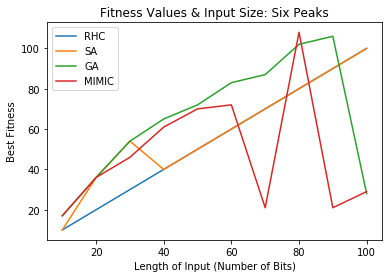

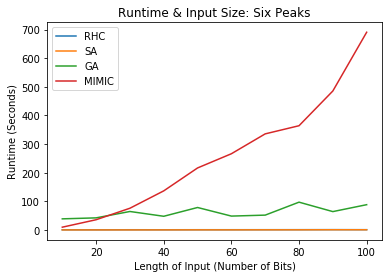

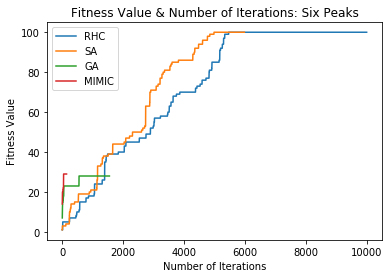

In [11]:
n_bits = [n for n in range(10, 110, 10)]
rhc_fitness, rhc_runtime, fitness_curve_rhc = RHC()
sa_fitness, sa_runtime, fitness_curve_sa = SA()
ga_fitness, ga_runtime, fitness_curve_ga = GA()
mimic_fitness, mimic_runtime, fitness_curve_mimic = MIMIC()

plt.figure()
plt.title('Fitness Values & Input Size: Six Peaks')
plt.xlabel('Length of Input (Number of Bits)')
plt.ylabel('Best Fitness')
plt.plot(n_bits, rhc_fitness, label='RHC')
plt.plot(n_bits, sa_fitness, label='SA')
plt.plot(n_bits, ga_fitness, label='GA')
plt.plot(n_bits, mimic_fitness, label='MIMIC')
plt.legend()
plt.savefig('6_peaks_input_size_fitness.png')
plt.show()

plt.figure()
plt.title('Runtime & Input Size: Six Peaks')
plt.xlabel('Length of Input (Number of Bits)')
plt.ylabel('Runtime (Seconds)')
plt.plot(n_bits, rhc_runtime, label='RHC')
plt.plot(n_bits, sa_runtime, label='SA')
plt.plot(n_bits, ga_runtime, label='GA')
plt.plot(n_bits, mimic_runtime, label='MIMIC')
plt.legend()
plt.savefig('6_peaks_input_size_time.png')
plt.show()

plt.figure()
plt.title('Fitness Value & Number of Iterations: Six Peaks')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness Value')
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_ga,label='GA')
plt.plot(fitness_curve_mimic,label='MIMIC')
plt.legend()
plt.savefig('6_peaks_iterations.png')
plt.show()

**<font color=black size=5>Fine Tunning</font>**
<br><br>
**<font color=green size=4>Parameters:	t_pct for RHC, SA and GA</font>**

In [4]:
# t_pct
def six_peaks_t():
    n = 100
    init_state = np.random.randint(2,size=n)
    schedule = mlrose.ExpDecay()
    
    
#     # RHC
#     problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.5), maximize=True, max_val=2)
#     best_state_1, best_fitness_1, fitness_curve_1 = mlrose.random_hill_climb(problem, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

#     problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.15), maximize=True, max_val=2)
#     best_state_2, best_fitness_2, fitness_curve_2 = mlrose.random_hill_climb(problem, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

#     problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.25), maximize=True, max_val=2)
#     best_state_3, best_fitness_3, fitness_curve_3 = mlrose.random_hill_climb(problem, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

#     problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.35), maximize=True, max_val=2)
#     best_state_4, best_fitness_4, fitness_curve_4 = mlrose.random_hill_climb(problem, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

#     problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.45), maximize=True, max_val=2)
#     best_state_5, best_fitness_5, fitness_curve_5 = mlrose.random_hill_climb(problem, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

#     plt.figure()
#     plt.plot(fitness_curve_1,label='t_pct = 0.5')
#     plt.plot(fitness_curve_2,label='t_pct = 0.15')
#     plt.plot(fitness_curve_3,label='t_pct = 0.25')
#     plt.plot(fitness_curve_4,label='t_pct = 0.35')
#     plt.plot(fitness_curve_5,label='t_pct = 0.45')
#     plt.legend()
#     plt.title('Fitness Value & Number of Iterations: Six Peaks (RHC)')
#     plt.xlabel('Number of Iterations')
#     plt.ylabel('Fitness Value')
#     plt.savefig('6_peaks_t_pct_RHC.png')

    
    # SA
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.5), maximize=True, max_val=2)
    best_state_1, best_fitness_1, fitness_curve_1 = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

    problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.15), maximize=True, max_val=2)
    best_state_2, best_fitness_2, fitness_curve_2 = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

    problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.25), maximize=True, max_val=2)
    best_state_3, best_fitness_3, fitness_curve_3 = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

    problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.35), maximize=True, max_val=2)
    best_state_4, best_fitness_4, fitness_curve_4 = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

    problem = mlrose.DiscreteOpt(length = n, fitness_fn = mlrose.SixPeaks(t_pct=0.45), maximize=True, max_val=2)
    best_state_5, best_fitness_5, fitness_curve_5 = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10000, max_iters=10000, init_state = init_state, curve=True)

    plt.figure()
    plt.plot(fitness_curve_1,label='t_pct = 0.5')
    plt.plot(fitness_curve_2,label='t_pct = 0.15')
    plt.plot(fitness_curve_3,label='t_pct = 0.25')
    plt.plot(fitness_curve_4,label='t_pct = 0.35')
    plt.plot(fitness_curve_5,label='t_pct = 0.45')
    plt.legend()
    plt.title('Fitness Value & Number of Iterations: Six Peaks (SA)')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
#     plt.savefig('6_peaks_t_pct_SA.png')

    
    # GA
#     problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.5), maximize=True, max_val=2)
#     best_state_1, best_fitness_1, fitness_curve_1 = mlrose.genetic_alg(problem, max_attempts = 10000, max_iters=10000, curve=True)

#     problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.15), maximize=True, max_val=2)
#     best_state_2, best_fitness_2, fitness_curve_2 = mlrose.genetic_alg(problem, max_attempts = 10000, max_iters=10000, curve=True)

#     problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.25), maximize=True, max_val=2)
#     best_state_3, best_fitness_3, fitness_curve_3 = mlrose.genetic_alg(problem, max_attempts = 10000, max_iters=10000, curve=True)

#     problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.35), maximize=True, max_val=2)
#     best_state_4, best_fitness_4, fitness_curve_4 = mlrose.genetic_alg(problem, max_attempts = 10000, max_iters=10000, curve=True)

#     problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.45), maximize=True, max_val=2)
#     best_state_5, best_fitness_5, fitness_curve_5 = mlrose.genetic_alg(problem, max_attempts = 10000, max_iters=10000, curve=True)

#     plt.figure()
#     plt.plot(fitness_curve_1,label='t_pct = 0.5')
#     plt.plot(fitness_curve_2,label='t_pct = 0.15')
#     plt.plot(fitness_curve_3,label='t_pct = 0.25')
#     plt.plot(fitness_curve_4,label='t_pct = 0.35')
#     plt.plot(fitness_curve_5,label='t_pct = 0.45')
#     plt.legend()
#     plt.title('Fitness Value & Number of Iterations: Six Peaks (GA)')
#     plt.xlabel('Number of Iterations')
#     plt.ylabel('Fitness Value')
#     plt.savefig('6_peaks_t_pct_GA.png')


C:\Users\jiawe\AppData\Roaming\Python\Python36\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


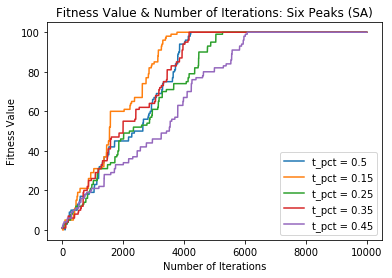

In [5]:
six_peaks_t()

**<font color=green size=4>Parameters:	restart for RHC</font>**

In [11]:
def six_peaks_rhc():
    fitness = mlrose.SixPeaks(t_pct = 0.15)
    problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2,size=100)
    schedule = mlrose.ExpDecay()
    best_state_rhc_1, best_fitness_rhc_1, fitness_curve_rhc_1 = mlrose.random_hill_climb(problem,restarts = 0, max_attempts = 1000, max_iters=1000, init_state = init_state, curve=True)
    best_state_rhc_2, best_fitness_rhc_2, fitness_curve_rhc_2 = mlrose.random_hill_climb(problem,restarts = 2, max_attempts = 1000, max_iters=1000, init_state = init_state, curve=True)
    best_state_rhc_3, best_fitness_rhc_3, fitness_curve_rhc_3 = mlrose.random_hill_climb(problem,restarts = 4, max_attempts = 1000, max_iters=1000, init_state = init_state, curve=True)
    best_state_rhc_4, best_fitness_rhc_4, fitness_curve_rhc_4 = mlrose.random_hill_climb(problem,restarts = 6, max_attempts = 1000, max_iters=1000, init_state = init_state, curve=True)
    best_state_rhc_5, best_fitness_rhc_5, fitness_curve_rhc_5 = mlrose.random_hill_climb(problem,restarts = 8, max_attempts = 1000, max_iters=1000, init_state = init_state, curve=True)
    best_state_rhc_6, best_fitness_rhc_6, fitness_curve_rhc_6 = mlrose.random_hill_climb(problem,restarts = 10, max_attempts = 1000, max_iters=1000, init_state = init_state, curve=True)

    plt.figure()
    plt.plot(fitness_curve_rhc_1,label='restarts = 0')
    plt.plot(fitness_curve_rhc_2,label='restarts = 2')
    plt.plot(fitness_curve_rhc_3,label='restarts = 4')
    plt.plot(fitness_curve_rhc_4,label='restarts = 6')
    plt.plot(fitness_curve_rhc_5,label='restarts = 8')
    plt.plot(fitness_curve_rhc_6,label='restarts = 10')
    plt.legend()
    plt.title('Parameter Analysis: Six Peaks (RHC-restart)')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.savefig('6_peaks_rhc_analysis.png')

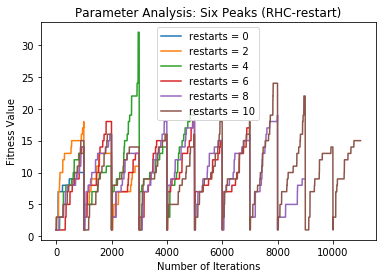

In [12]:
six_peaks_rhc()

**<font color=green size=4>Parameters:     mutation probability and population size for GA</font>**

In [9]:
def six_peaks_ga():
    n = 100
    init_state = np.random.randint(2,size=n)
    schedule = mlrose.ExpDecay()
    fitness = mlrose.SixPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize=True, max_val=2)

    best_state_ga_1, best_fitness_ga_1, fitness_curve_ga_1 = mlrose.genetic_alg(problem,mutation_prob=0.1,pop_size=100,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_2, best_fitness_ga_2, fitness_curve_ga_2 = mlrose.genetic_alg(problem,mutation_prob=0.2,pop_size=100 ,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_3, best_fitness_ga_3, fitness_curve_ga_3 = mlrose.genetic_alg(problem,mutation_prob=0.5,pop_size=100 ,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_4, best_fitness_ga_4, fitness_curve_ga_4 = mlrose.genetic_alg(problem,mutation_prob=0.1,pop_size=200 ,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_5, best_fitness_ga_5, fitness_curve_ga_5 = mlrose.genetic_alg(problem,mutation_prob=0.2,pop_size=200 ,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_6, best_fitness_ga_6, fitness_curve_ga_6 = mlrose.genetic_alg(problem,mutation_prob=0.5,pop_size=200 ,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_7, best_fitness_ga_7, fitness_curve_ga_7 = mlrose.genetic_alg(problem,mutation_prob=0.1,pop_size=500 ,max_attempts = 10000, max_iters=10000, curve=True)
    best_state_ga_8, best_fitness_ga_8, fitness_curve_ga_8 = mlrose.genetic_alg(problem,mutation_prob=0.5,pop_size=500 ,max_attempts = 10000, max_iters=10000, curve=True)

    plt.figure()
    plt.plot(fitness_curve_ga_1,label='0.1 / 100')
    plt.plot(fitness_curve_ga_2,label='0.2 / 100')
    plt.plot(fitness_curve_ga_3,label='0.5 / 100')
    plt.plot(fitness_curve_ga_4,label='0.1 / 200')
    plt.plot(fitness_curve_ga_5,label='0.2 / 200')
    plt.plot(fitness_curve_ga_6,label='0.5 / 200')
    plt.plot(fitness_curve_ga_7,label='0.1 / 500')
    plt.plot(fitness_curve_ga_8,label='0.5 / 500')
    plt.legend()
    plt.title('Parameter Analysis: Six Peaks (GA-mut/pop)')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.savefig('6_peaks_ga_analysis.png')

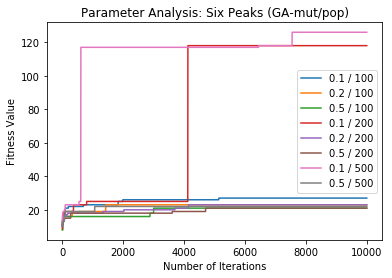

In [13]:
six_peaks_ga()

**<font color=green size=4>Parameters:     mutation probability and population size for MIMIC</font>**

In [ ]:
def six_peaks_mimic():
    n = 100
    init_state = np.random.randint(2,size=n)
    schedule = mlrose.ExpDecay()
    fitness = mlrose.SixPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize=True, max_val=2)
    
    best_state_1, best_fitness_1, fitness_curve_1 = mlrose.mimic(problem,keep_pct=0.1,pop_size=100,max_attempts = 100, max_iters=10000, curve=True)
    best_state_2, best_fitness_2, fitness_curve_2 = mlrose.mimic(problem,keep_pct=0.2,pop_size=100 ,max_attempts = 100, max_iters=10000, curve=True)
    best_state_3, best_fitness_3, fitness_curve_3 = mlrose.mimic(problem,keep_pct=0.5,pop_size=100 ,max_attempts = 100, max_iters=10000, curve=True)
    best_state_4, best_fitness_4, fitness_curve_4 = mlrose.mimic(problem,keep_pct=0.1,pop_size=200 ,max_attempts = 100, max_iters=10000, curve=True)
    best_state_5, best_fitness_5, fitness_curve_5 = mlrose.mimic(problem,keep_pct=0.2,pop_size=200 ,max_attempts = 100, max_iters=10000, curve=True)
    best_state_6, best_fitness_6, fitness_curve_6 = mlrose.mimic(problem,keep_pct=0.5,pop_size=200 ,max_attempts = 100, max_iters=10000, curve=True)
    best_state_7, best_fitness_7, fitness_curve_7 = mlrose.mimic(problem,keep_pct=0.1,pop_size=500 ,max_attempts = 100, max_iters=10000, curve=True)
    best_state_8, best_fitness_8, fitness_curve_8 = mlrose.mimic(problem,keep_pct=0.5,pop_size=500 ,max_attempts = 100, max_iters=10000, curve=True)

    plt.figure()
    plt.plot(fitness_curve_1,label='0.1 / 100')
    plt.plot(fitness_curve_2,label='0.2 / 100')
    plt.plot(fitness_curve_3,label='0.5 / 100')
    plt.plot(fitness_curve_4,label='0.1 / 200')
    plt.plot(fitness_curve_5,label='0.2 / 200')
    plt.plot(fitness_curve_6,label='0.5 / 200')
    plt.plot(fitness_curve_7,label='0.1 / 500')
    plt.plot(fitness_curve_8,label='0.5 / 500')
    plt.legend()
    plt.title('Parameter Analysis: Six Peaks (MIMIC-mut/pop)')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.savefig('6_peaks_mimic_analysis.png')

In [ ]:
six_peaks_mimic()

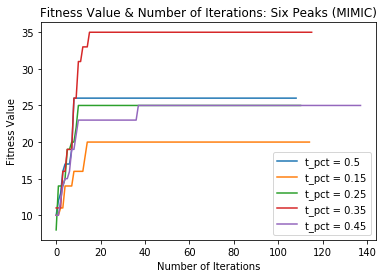

In [12]:
n = 100
init_state = np.random.randint(2,size=n)
schedule = mlrose.ExpDecay()
# MIMIC
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.5), maximize=True, max_val=2)
best_state_1, best_fitness_1, fitness_curve_1 = mlrose.mimic(problem,pop_size=200, max_attempts = 100, max_iters=10000, curve=True)

problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.15), maximize=True, max_val=2)
best_state_2, best_fitness_2, fitness_curve_2 = mlrose.mimic(problem,pop_size=200, max_attempts = 100, max_iters=10000, curve=True)

problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.25), maximize=True, max_val=2)
best_state_3, best_fitness_3, fitness_curve_3 = mlrose.mimic(problem,pop_size=200, max_attempts = 100, max_iters=10000, curve=True)

problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.35), maximize=True, max_val=2)
best_state_4, best_fitness_4, fitness_curve_4 = mlrose.mimic(problem,pop_size=200, max_attempts = 100, max_iters=10000, curve=True)
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.SixPeaks(t_pct=0.45), maximize=True, max_val=2)
best_state_5, best_fitness_5, fitness_curve_5 = mlrose.mimic(problem,pop_size=200, max_attempts = 100, max_iters=10000, curve=True)

plt.figure()
plt.plot(fitness_curve_1,label='t_pct = 0.5')
plt.plot(fitness_curve_2,label='t_pct = 0.15')
plt.plot(fitness_curve_3,label='t_pct = 0.25')
plt.plot(fitness_curve_4,label='t_pct = 0.35')
plt.plot(fitness_curve_5,label='t_pct = 0.45')
plt.legend()
plt.title('Fitness Value & Number of Iterations: Six Peaks (MIMIC)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness Value')
plt.savefig('6_peaks_t_pct_MIMIC.png')
plt.show()